# Analyzing-data-on-Nobel-Prize-winners

### The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right? Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np

# Read in the Nobel Prize data
data_file_path = '/content/nobe.csv'
nobel_data = pd.read_csv(data_file_path, encoding='unicode_escape')

### 1.What is the most awarded gender and birth_country? Save your answers as top_gender and top_country.


#1 Most Awarded Gender and Birth Country

Most awarded gender: Male
Most awarded birth country: United States of America

____________________


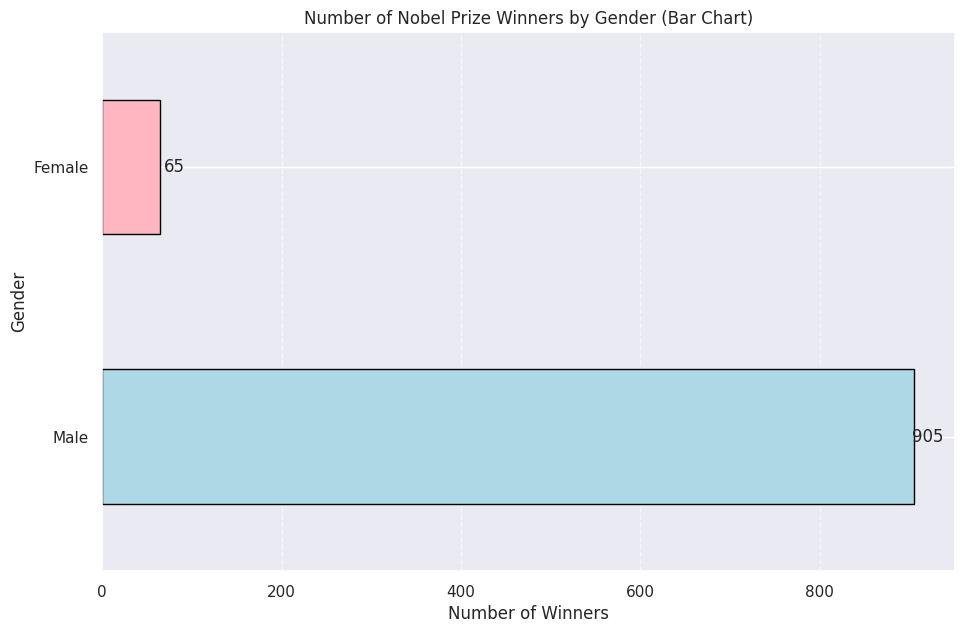

In [32]:
def most_awarded_gender_and_country(nobel_data):
    # Section 1: Most Awarded Gender and Birth Country
    print("\n\033[1m#1 Most Awarded Gender and Birth Country\033[0m\n")
    top_gender = nobel_data['sex'].value_counts().idxmax()
    top_country = nobel_data['birth_country'].value_counts().idxmax()

    print(f"Most awarded gender: \033[1m{top_gender}\033[0m")
    print(f"Most awarded birth country: \033[1m{top_country}\033[0m")
    print("\n____________________")

    # Visualize the number of Nobel Prize winners by gender
    gender_counts = nobel_data['sex'].value_counts()
    ax = gender_counts.plot(kind='barh', color=['lightblue', 'lightpink'], edgecolor='black')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    plt.title('Number of Nobel Prize Winners by Gender (Bar Chart)')
    plt.xlabel('Number of Winners')
    plt.ylabel('Gender')
    plt.show()
most_awarded_gender_and_country(nobel_data)


### 2. Rearrange the data by decade (1900-1910-1920 ..etc). Which year has the highest rate of US-born winners? Store this as an integer called max_decade_usa.


#2 Decade with the Highest Rate of US-born Winners

The decade with the highest rate of US-born winners is 2000.


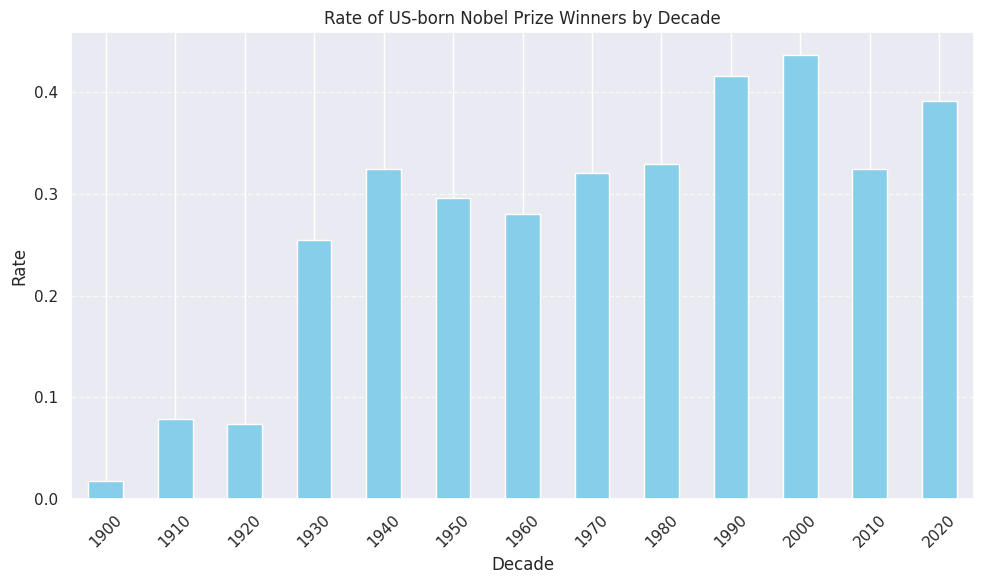

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def highest_rate_us_born_winners(nobel_data):
    # Section 2: Decade with the Highest Rate of US-born Winners
    print("\n\033[1m#2 Decade with the Highest Rate of US-born Winners\033[0m\n")
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_counts = nobel_data.groupby(['decade', 'birth_country']).size().unstack().fillna(0)
    decade_counts['us_rate'] = decade_counts['United States of America'] / decade_counts.sum(axis=1)

    max_decade_usa = decade_counts['us_rate'].idxmax()

    print(f"The decade with the highest rate of US-born winners is \033[1m{max_decade_usa}\033[0m.")

    # Visualization
    plt.figure(figsize=(10, 6))
    decade_counts['us_rate'].plot(kind='bar', color='skyblue')
    plt.title('Rate of US-born Nobel Prize Winners by Decade')
    plt.xlabel('Decade')
    plt.ylabel('Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

highest_rate_us_born_winners(nobel_data)




### 3. Rearrange the data by decade (1900-1910-1920 ..etc). Which decade and category pair had the highest proportion of female award winners? Store this as a dictionary called max_female_dict, where decade is key and category is value.



In [34]:
def highest_proportion_female_winners(nobel_data):
    # Section 3: Decade and Category Pair with Highest Proportion of Female Winners
    print("\n\033[1m#3 Decade and Category Pair with Highest Proportion of Female Winners\033[0m\n")
    nobel_data['year'] = pd.to_datetime(nobel_data['year'], format='%Y')
    nobel_data['decade'] = (nobel_data['year'].dt.year // 10) * 10

    decade_category_counts = nobel_data.groupby(['decade', 'category', 'sex']).size().unstack(fill_value=0)
    decade_category_counts['female_proportion'] = (decade_category_counts['Female'] / decade_category_counts.sum(axis=1)).fillna(0)

    max_female_decade_category = decade_category_counts.groupby('decade')['female_proportion'].idxmax()

    # Create a list of rows for the table
    table_data = []
    for decade, category in max_female_decade_category.items():
        table_data.append([decade, category[1]])  # Extract the category from the tuple

    # Print the table using tabulate with lines between the values
    print(tabulate(table_data, headers=['Decade', 'Category'], tablefmt='pipe'))

# Call the function
highest_proportion_female_winners(nobel_data)


#3 Decade and Category Pair with Highest Proportion of Female Winners

|   Decade | Category   |
|---------:|:-----------|
|     1900 | Literature |
|     1910 | Chemistry  |
|     1920 | Literature |
|     1930 | Peace      |
|     1940 | Peace      |
|     1950 | Chemistry  |
|     1960 | Literature |
|     1970 | Peace      |
|     1980 | Medicine   |
|     1990 | Literature |
|     2000 | Literature |
|     2010 | Peace      |
|     2020 | Literature |


### 4. Who is the first woman to receive a Nobel Prize and in what category did she receive this award? Save your answers as first_woman_name and first_woman_category.



In [35]:
# Picking out the first woman to win a Nobel Prize
first_woman = nobel_data[nobel_data['sex'] == 'Female'].nsmallest(1, 'year')

# Displaying the first woman to win a Nobel Prize
first_woman

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, nÃ©e Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900


### 5. Which individuals or organizations have won more than one Nobel Prize over the years? Store the full names in a list called repeat_list.




#5 Individuals or Organizations with More Than One Nobel Prize

* Marie Curie, nÃ©e Sklodowska
* ComitÃ© international de la Croix Rouge (International Committee of the Red Cross)
* Linus Carl Pauling
* Office of the United Nations High Commissioner for Refugees (UNHCR)
* John Bardeen
* Frederick Sanger
* K. Barry Sharpless
* Barry Sharpless


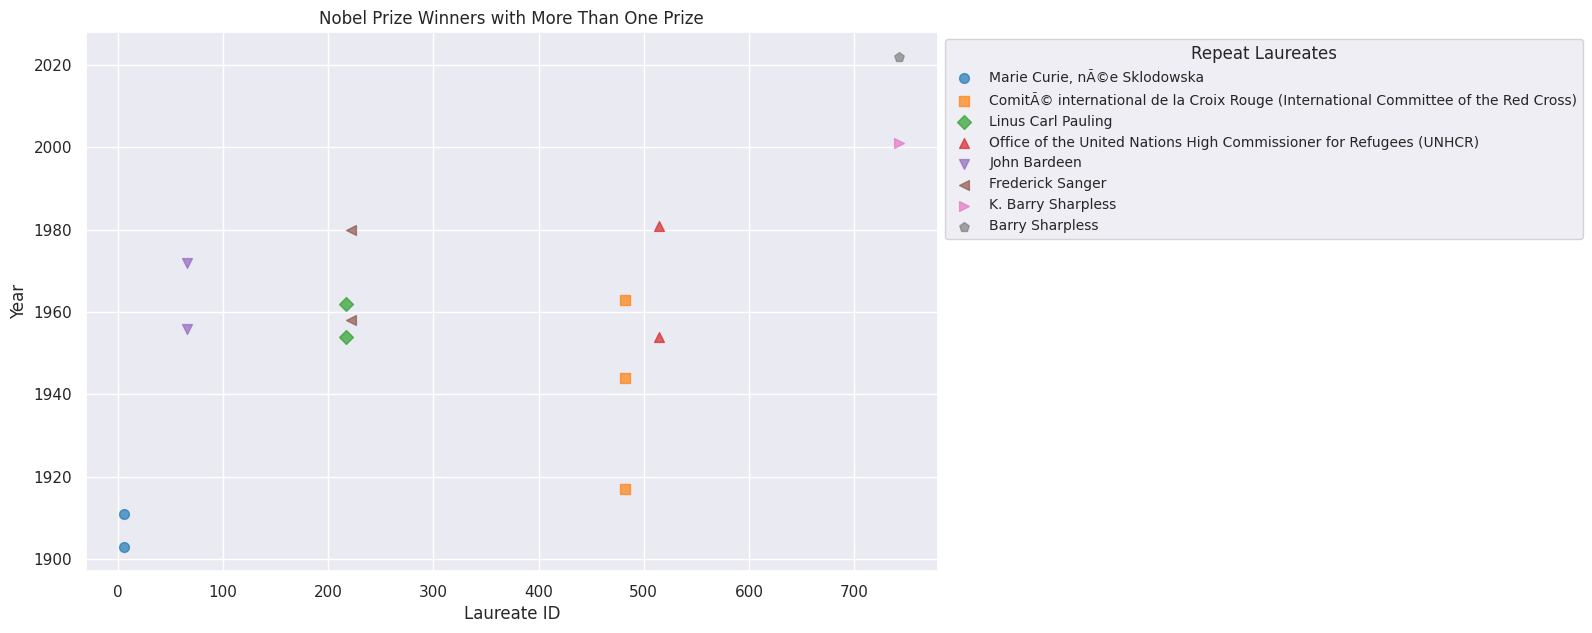

In [36]:
def individuals_or_organizations_with_multiple_prizes(nobel_data):
    # Section 5: Individuals or Organizations with More Than One Nobel Prize
    print("\n\033[1m#5 Individuals or Organizations with More Than One Nobel Prize\033[0m\n")
    prizes_per_laureate = nobel_data.groupby('laureate_id').size()
    repeat_laureates = prizes_per_laureate[prizes_per_laureate > 1].index
    repeat_list = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]['full_name'].unique().tolist()

    for name in repeat_list:
        print(f"* \033[1m{name}\033[0m")

    # Visualization Considerations
    if len(repeat_list) > 0:
        # Scatter plot for individuals or organizations with more than one Nobel Prize
        repeat_laureates_data = nobel_data[nobel_data['laureate_id'].isin(repeat_laureates)]

        unique_colors = plt.cm.tab10(range(len(repeat_list)))
        unique_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

        for i, name in enumerate(repeat_list):
            laureate_data = repeat_laureates_data[repeat_laureates_data['full_name'] == name]
            plt.scatter(laureate_data['laureate_id'], laureate_data['year'], s=50, alpha=0.7, label=name,
                        color=unique_colors[i], marker=unique_markers[i])

        plt.title('Nobel Prize Winners with More Than One Prize')
        plt.xlabel('Laureate ID')
        plt.ylabel('Year')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Repeat Laureates', fontsize='small')
        plt.show()

individuals_or_organizations_with_multiple_prizes(nobel_data)




### 6. What is the gender of a typical Nobel Prize winner?

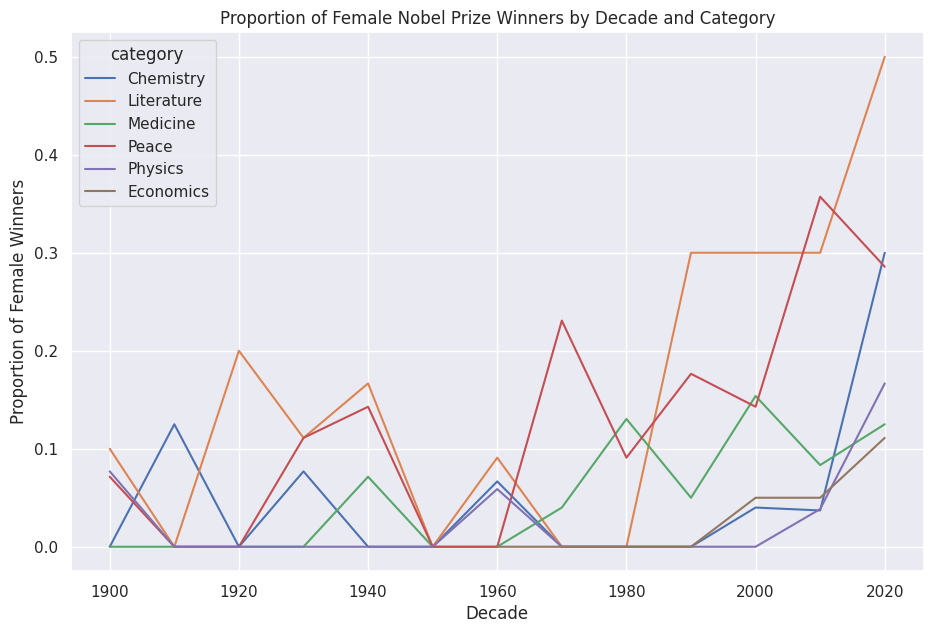

In [37]:
# Calculating the proportion of female laureates per decade
nobel_data['female_winner'] = nobel_data['sex'] == "Female"
prop_female_winners = nobel_data.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting proportion of female laureates by decade and category
sns.set()
plt.rcParams['figure.figsize'] = [11, 7]

ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

ax.set_xlabel('Decade')
ax.set_ylabel('Proportion of Female Winners')
ax.set_title('Proportion of Female Nobel Prize Winners by Decade and Category')

plt.show()